In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

In [9]:
df = pd.read_csv("train.csv")

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [11]:
dtypes = df.dtypes
n_uniq = df.nunique()
pd.DataFrame({"dtybe":dtypes,"num_unoqe":n_uniq}).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
dtybe,int64,int64,object,float64,int64,int64,float64,object,object
num_unoqe,2,3,2,88,7,7,248,147,3


In [12]:
def chk_types(data):
    dtypes = df.dtypes
    n_uniq = df.nunique()

    return pd.DataFrame({"Dtype":dtypes, "Num_Unige":n_uniq} ).T

In [13]:
chk_types(df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Dtype,int64,int64,object,float64,int64,int64,float64,object,object
Num_Unige,2,3,2,88,7,7,248,147,3


In [14]:
cols =['Pclass','Survived','Sex','SibSp','Parch','Embarked']
df[cols] =df[cols].astype('category')

In [15]:
chk_types(df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Dtype,category,category,category,float64,category,category,float64,object,category
Num_Unige,2,3,2,88,7,7,248,147,3


In [16]:
df.shape[0]


891

In [17]:
null = df.isnull().sum()
ratio =(null/df.shape[0])*100
pd.DataFrame({"Null":null, "ratio %":ratio} ).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Null,0.0,0.0,0.0,177.00000,0.0,0.0,0.0,687.000000,2.000000
ratio %,0.0,0.0,0.0,19.86532,0.0,0.0,0.0,77.104377,0.224467


In [18]:
def check_null(data):

    null = data.isnull().sum()
    ratio =(null/df.shape[0])*100
    return pd.DataFrame({"Null":null, "ratio %":ratio} ).T

In [19]:
madian_1 = df['Age'].median()
df['Age'].fillna(madian_1 ,inplace=True)
pd.DataFrame({"Null":null, "ratio %":ratio} ).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Null,0.0,0.0,0.0,177.00000,0.0,0.0,0.0,687.000000,2.000000
ratio %,0.0,0.0,0.0,19.86532,0.0,0.0,0.0,77.104377,0.224467


In [20]:
df.dropna(subset=['Embarked'], inplace= True)
df = df.drop("Cabin",axis=1)

In [21]:
null = df.isnull().sum()
ratio = (null/ df.shape[0])*100
pd.DataFrame({"Null":null, "ratio % ":ratio}).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ratio %,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


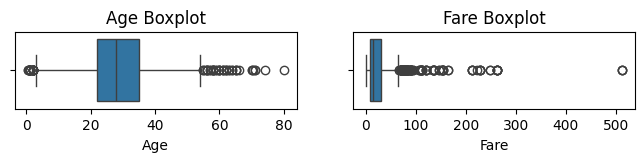

In [22]:
num_cols = df.select_dtypes('number').columns
plt.figure(figsize=(8,1))
for i ,col in enumerate(num_cols):
    plt.subplot(1,2,i+1)
    sns.boxplot(df[col],orient="h")
    plt.title(f"{col} Boxplot")

In [23]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    Lower_Fence = Q1 - 1.5 * IQR
    Upper_Fence = Q3 + 1.5 * IQR

    df.loc[df[col] < Lower_Fence, col] = Lower_Fence
    df.loc[df[col] > Upper_Fence, col] = Upper_Fence


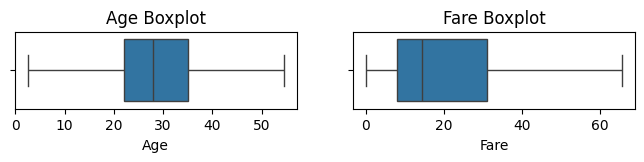

In [24]:
num_cols = df.select_dtypes('number').columns
plt.figure(figsize=(8,1))
for i ,col in enumerate(num_cols):
    plt.subplot(1,2,i+1)
    sns.boxplot(df[col],orient="h")
    plt.title(f"{col} Boxplot")

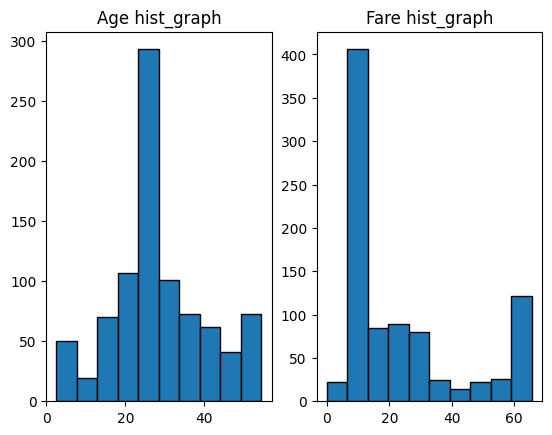

In [25]:
num_cols = df.select_dtypes('number').columns
plt.Figure(figsize=(9,2))
for i ,col in enumerate(num_cols):
    plt.subplot(1,2,i+1)
    plt.hist(df[col],edgecolor = "black")
    plt.title(f"{col} hist_graph")

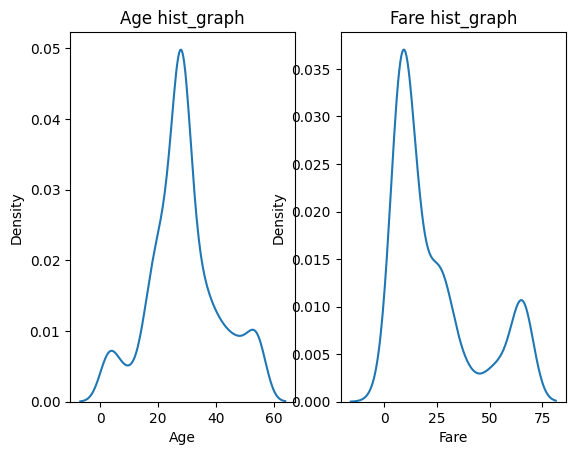

In [26]:
num_cols = df.select_dtypes('number').columns
plt.Figure(figsize=(9,2))
for i ,col in enumerate(num_cols):
    plt.subplot(1,2,i+1)
    sns.kdeplot(df[col])
    plt.title(f"{col} hist_graph")

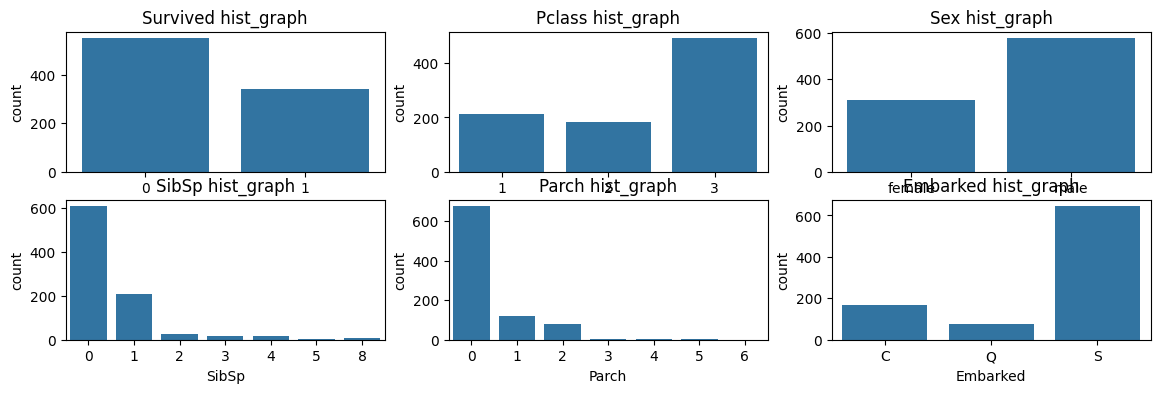

In [27]:
cat_cols = df.select_dtypes("category").columns
plt.figure(figsize=(14,4))
for i, col in enumerate(cat_cols):
    plt.subplot(2, 3, i+1)
    sns.countplot(x = col, data = df)
    plt.title(f"{col} hist_graph")
plt.show()

In [28]:
unique =df['Pclass'].value_counts()
count = unique.values
print(unique,count)

Pclass
3    491
1    214
2    184
Name: count, dtype: int64 [491 214 184]


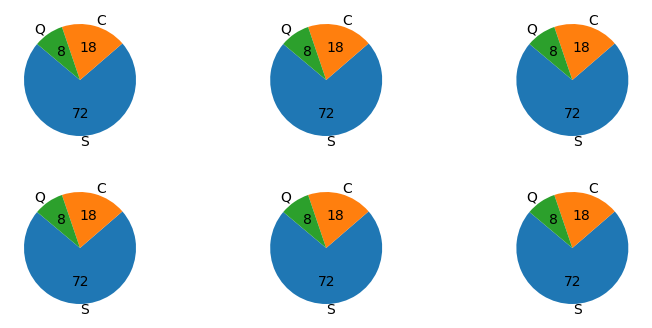

In [29]:
cat_cols = df.select_dtypes("category").columns
plt.figure(figsize=(9,4))
for i , cols in enumerate(cat_cols):
    plt.subplot(2,3,i+1)
    unique =df[col].value_counts()
    count = unique.values
    categories =unique.index
    plt.pie(count,labels=categories,startangle=140,autopct='%1.1d')

    

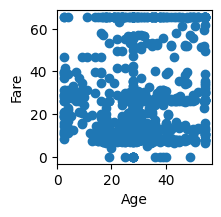

In [30]:
plt.figure(figsize=(2,2))
plt.scatter(df['Age'],df['Fare'])
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

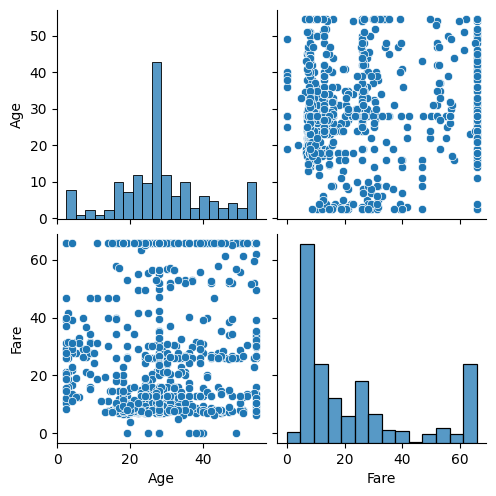

In [31]:
sns.pairplot(df)

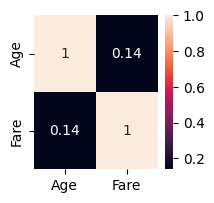

In [32]:
corr =df[num_cols].corr()
plt.figure(figsize=(2,2))
sns.heatmap(corr,annot=True)
plt.show()

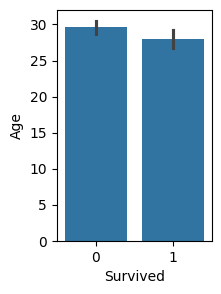

In [33]:
plt.figure(figsize=(2,3))
sns.barplot(x="Survived",y="Age",data = df)
plt.show()

<Axes: xlabel='Sex', ylabel='Survived'>

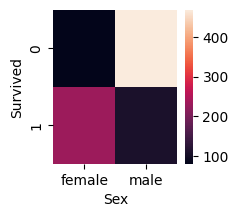

In [34]:
plt.figure(figsize=(2,2))
agg = df.pivot_table(index="Survived", columns="Sex", values="Age", aggfunc=len)
sns.heatmap(agg)